In [123]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

In [124]:
(x_train, y_train),(x_test,y_test) = datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [125]:
#We have three dimensions for a single data but the 3 stands for RGB channels
#50K datasets

In [126]:
x_test.shape

(10000, 32, 32, 3)

In [127]:
#The dataset has been divided in the ratio 1/5

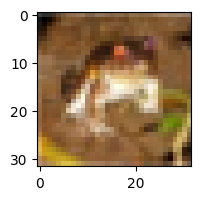

In [128]:
plt.figure(figsize = (5,2))
plt.imshow(x_train[0])
plt.show()

In [129]:
#The figure looks like a frog
#Our dataset is fine

In [130]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [131]:
#its an 2D array which we dont need. we need a 1D array

In [138]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [139]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [140]:
def ImageDisplayer(x,y,index):
    plt.figure(figsize = (5,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

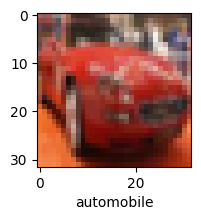

In [141]:
ImageDisplayer(x_train,y_train,5)

In [142]:
#This functions is created just for fun and better visualization

In [143]:
#Now lets normalize the x_test and x_train

In [144]:
x_train = x_train/255
x_test = x_test/255

In [145]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [146]:
#The values have been normalized

In [147]:
model = keras.Sequential([
    layers.Flatten(input_shape=(32,32,3)), #For flattening the array
    layers.Dense(300,activation = 'relu'),
    layers.Dense(300,activation = 'relu'),
    layers.Dense(10,activation = 'sigmoid')
])

model.compile(optimizer = 'adam',loss ='sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(x_train,y_train,epochs = 5, verbose = 2)

The accuracies are so low that we have tried to change the number of neurons in hidden layers and the number of hidden layers

In [148]:
 loss , accuracy = model.evaluate(x_test,y_test,)

We have a very low accuracy using the Neural Network

We can print the classification Report

In [151]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred_probs = model.predict(x_test)  # Get probabilities
y_pred = np.argmax(y_pred_probs, axis=1)   # Convert probabilities to class labels (0 or 1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
#disp.plot(cmap='Blues')


ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of labels (2).

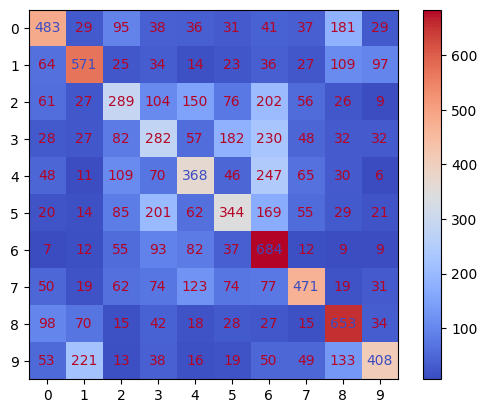

In [165]:
disp.plot(cmap = 'coolwarm')

One can see that there is a very high amount of error present in this model

In [153]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

**We have tried HyperParameter tuning and other techniques but in vain. now we will use the CNN technique to get better accuracies**

In [159]:
cnn = keras.Sequential([
    layers.Conv2D(filters = 32,kernel_size = (3,3), activation = 'relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 32,kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(50,activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [160]:
cnn.compile(optimizer = 'adam',loss ='sparse_categorical_crossentropy', metrics = ['accuracy'])
cnn.fit(x_train,y_train,epochs=10,verbose = 2)

Epoch 1/10
1563/1563 - 28s - 18ms/step - accuracy: 0.4686 - loss: 1.4856
Epoch 2/10
1563/1563 - 24s - 16ms/step - accuracy: 0.5954 - loss: 1.1563
Epoch 3/10
1563/1563 - 25s - 16ms/step - accuracy: 0.6398 - loss: 1.0316
Epoch 4/10
1563/1563 - 25s - 16ms/step - accuracy: 0.6656 - loss: 0.9568
Epoch 5/10
1563/1563 - 25s - 16ms/step - accuracy: 0.6896 - loss: 0.8963
Epoch 6/10
1563/1563 - 25s - 16ms/step - accuracy: 0.7023 - loss: 0.8556
Epoch 7/10
1563/1563 - 25s - 16ms/step - accuracy: 0.7144 - loss: 0.8172
Epoch 8/10
1563/1563 - 25s - 16ms/step - accuracy: 0.7274 - loss: 0.7806
Epoch 9/10
1563/1563 - 25s - 16ms/step - accuracy: 0.7382 - loss: 0.7497
Epoch 10/10
1563/1563 - 26s - 16ms/step - accuracy: 0.7477 - loss: 0.7232


The accuracy is quite better as compared to what we got in the artificial neural network model. The dataset is quite tough so we are quite happy with the accuracy

In [161]:

cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6792 - loss: 0.9383 


[0.9403103590011597, 0.6769000291824341]

This is an acceptable accuracy compared what we had earlier

Maybe more number of Epochs can increase the model accuracy further but it is taking a hell lot of time(cry emoji)

In [162]:
y_pred = cnn.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step 


In [163]:
y_pred

array([[2.45342002e-04, 6.88948110e-03, 7.27475714e-03, ...,
        2.31556362e-04, 1.49085792e-03, 1.48192886e-03],
       [2.85478961e-03, 2.81941472e-03, 7.13457780e-07, ...,
        3.55689309e-08, 9.94225323e-01, 9.89004984e-05],
       [5.87771945e-02, 4.69143391e-02, 3.59595986e-03, ...,
        2.90314038e-03, 8.64531755e-01, 8.36323388e-03],
       ...,
       [2.43320115e-04, 2.27595337e-05, 1.39904708e-01, ...,
        1.23661526e-01, 2.24126765e-04, 2.84382724e-04],
       [5.83339657e-04, 9.96013284e-01, 5.80015185e-04, ...,
        1.08092281e-04, 2.31694339e-05, 2.34397405e-04],
       [1.33313706e-05, 1.27877524e-06, 6.07696595e-04, ...,
        9.92315292e-01, 5.86959459e-08, 3.38125869e-06]],
      shape=(10000, 10), dtype=float32)

In [164]:
y_pred_classes = [np.argmax(i) for i in y_pred]

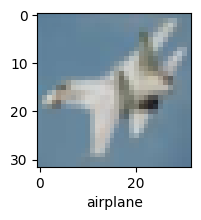

In [187]:
ImageDisplayer(x_test, y_pred_classes, 10)

In [188]:
#Even i am unable to identify what is it :(((

In [189]:
print(f' Predicted :{classes[y_pred_classes[10]]}, Actually : {classes[y_test[10]]}')

 Predicted :airplane, Actually : airplane


**So we can check by using the above function if the predicted and the actual values(labels) are same or not**

## So we have successfully implemented CNN using the tensoflow library

**Thank you**